<a href="https://colab.research.google.com/github/raularaju/GameTheory/blob/main/IFC_DilemaDoPrisioneiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numba import jit, njit, config, __version__, errors
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
@jit(nopython=True)
def vizinhos(N):
  #Define a tabela de vizinhos
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int16)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: viz[k,3] = k+N-L
  return viz

In [3]:
def calcular_matriz_ganhos(b):
  return np.array([[0,b], [0,1]])

In [4]:
COOP = 1
DES = 0
L = 200
TAM_REDE = 200 * 200

In [5]:
def calcular_evolucao(n_iter, b, K):
  tam_rede = TAM_REDE
  estrategia = np.random.randint(2, size = tam_rede) # inicializa aleatoriamente o array com 0s e 1s. 0 é desertor, 1 é cooperador
  arr_estrategias = [estrategia.copy()]
  num_coop = sum(estrategia)
  arr_num_coop = [num_coop]
  viz = vizinhos(tam_rede)
  matriz_ganhos = calcular_matriz_ganhos(b)
  for i in range(n_iter):
    x = random.randint(0, tam_rede - 1)
    vizinhos_x = np.append(viz[x], x) # um indivíduo é vizinho dele mesmo
    e_x = 0
    for vizinho in vizinhos_x:
      e_x += matriz_ganhos[estrategia[x], estrategia[vizinho]]
    y = np.random.choice(vizinhos_x)
    if estrategia[x] == estrategia[y]:
      continue
    vizinhos_y = np.append(viz[y], y) # um indivíduo é vizinho dele mesmo
    e_y = 0
    for vizinho in vizinhos_y:
      e_y += matriz_ganhos[estrategia[y], estrategia[vizinho]]
    W = 1 / (1 + np.exp(- (e_y - e_x)/ K))

    if W > random.uniform(0, 1): # x muda de estratégia
      if estrategia[x] == COOP:
        num_coop -= 1
      elif estrategia[x] == DES:
        num_coop += 1
      estrategia[x]  = estrategia[y]
    arr_num_coop.append(num_coop)
    if(not(i % 10000)):
      arr_estrategias.append(estrategia.copy())
  return arr_num_coop, arr_estrategias

In [6]:
def plotar_grafico(data, title="Evolução número de cooperadores", xlabel="Tempo", ylabel="Densidade cooperadores"):
    plt.plot(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [7]:
def plotar_arrays(a, b, title="Array Plot", xlabel="Array b", ylabel="Array a"):
    plt.plot(a, b, marker='o')  # Plot a against b with markers
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
def plotar_evolucao_espacial(arr_estrategias):
    for estrategia in arr_estrategias:
        N = int(np.sqrt(len(estrategia)))
        reshaped_array = np.array(estrategia).reshape((N, N))

        # Create a colormap where 0 corresponds to black (Desertor) and 1 corresponds to white (Cooperador)
        cmap = plt.get_cmap('binary_r')

        # Plot the grid with black and white colors
        plt.imshow(reshaped_array, cmap=cmap, interpolation='none')

        # Create a legend for the plot
        white_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Cooperador')
        black_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Desertor')

        # Add the legend to the plot
        plt.legend(handles=[black_patch, white_patch], title='Legend')

        plt.title("Evolução espacial")
        plt.show()

In [9]:
def get_densidade_coop_por_b(array_b, K):
  arr_num_coop_por_b = []
  for b in array_b:
    arr_num_coop, _  = calcular_evolucao(5000000, b, K)
    arr_num_coop_por_b.append(arr_num_coop[-1])
  return [num_coop / TAM_REDE for num_coop in arr_num_coop_por_b]

In [10]:
array_b = np.linspace(1, 2, 10)
K = 0.5
arr_densidade_coop_por_b = get_densidade_coop_por_b(array_b, K)

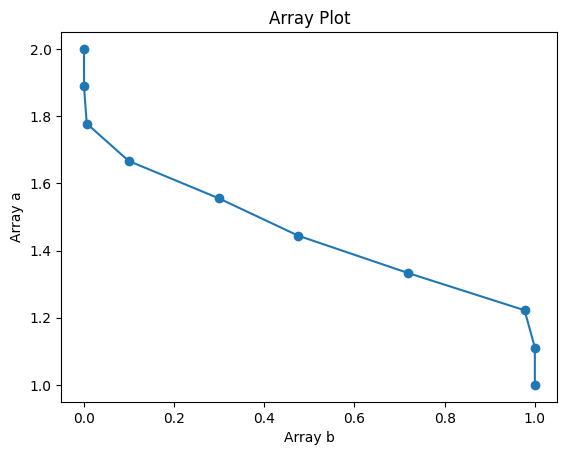

In [12]:
plotar_arrays(arr_densidade_coop_por_b, array_b)

O modelo possui duas
fases absorventes, que são fases onde a dinâmica cessa após todos indivíduos
assumirem o mesmo estado, seja ele cooperativo ou desertor. Para 𝑏 < 𝑏1 a densidade
de cooperadores, 𝑐, será 1, enquanto para 𝑏 > 𝑏2 teremos 𝑐 = 0. Para 𝑏1 < 𝑏 < 𝑏2,
após um tempo suficientemente longo, o sistema irá tender a um estado estacionário
onde a concentração de cooperadores oscilará em torno de um valor constante

Ao analisar o gráfico acima, podemos estimar o b1 como sendo 1.2 e b2 sendo 1.8

In [13]:
n_iter = 10000000
b = 2
K = 0.02
arr_num_coop, arr_estrategias = calcular_evolucao(n_iter, b, K)


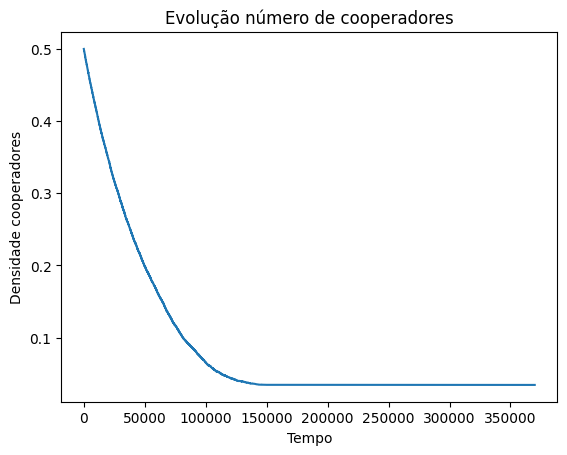

In [14]:
arr_coop_densidade = [num_coop/ (L * L) for num_coop in arr_num_coop]
plotar_grafico(arr_coop_densidade)

Ao analisar o gráfico acima, observa-se que a estratégia da população se estabiliza após mais ou menos iterações e que a densidade de cooperadores fica oscilando em torno de .


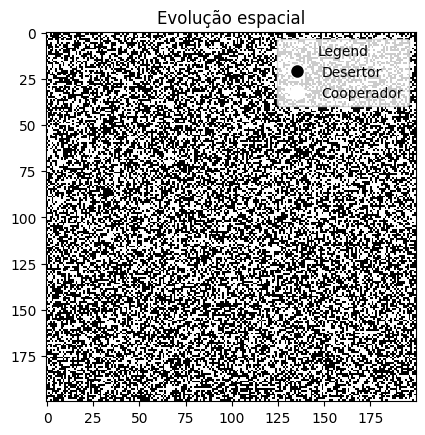

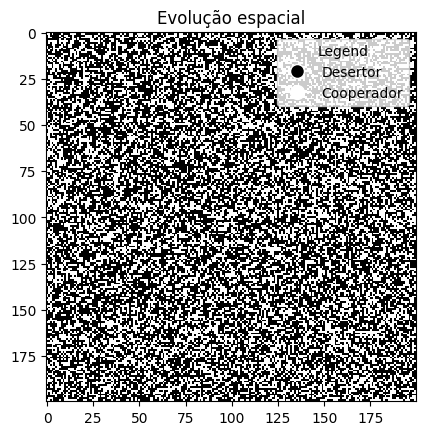

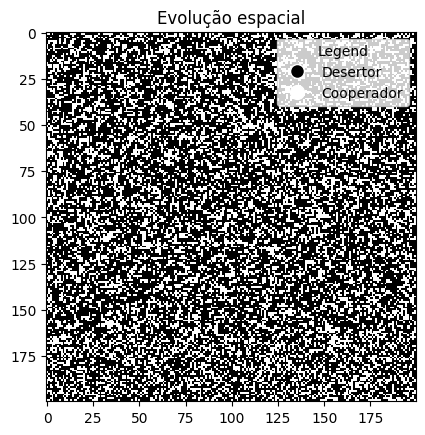

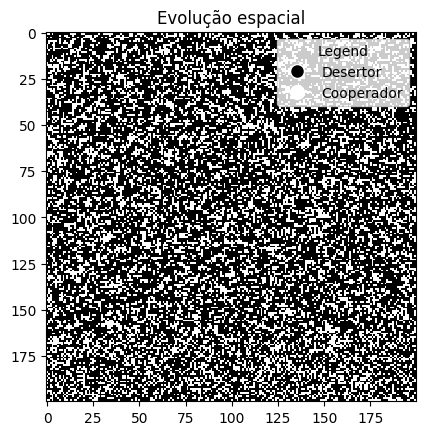

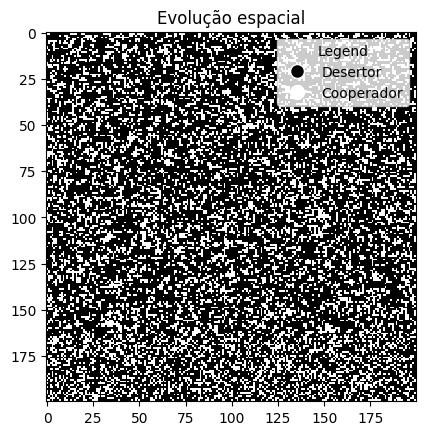

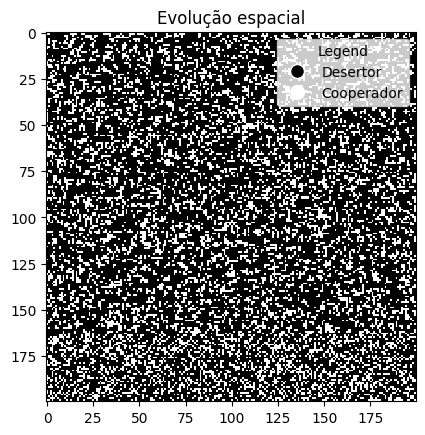

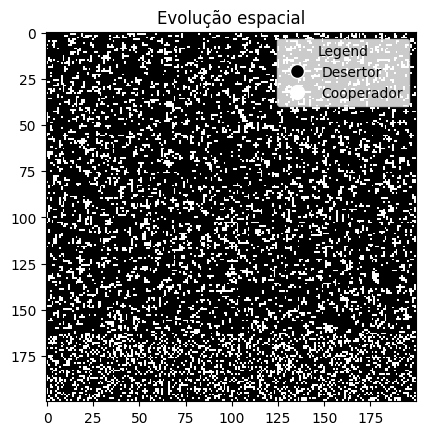

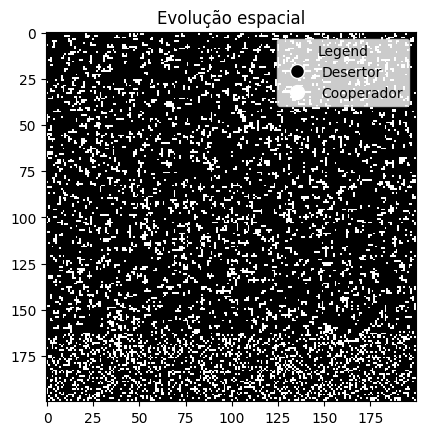

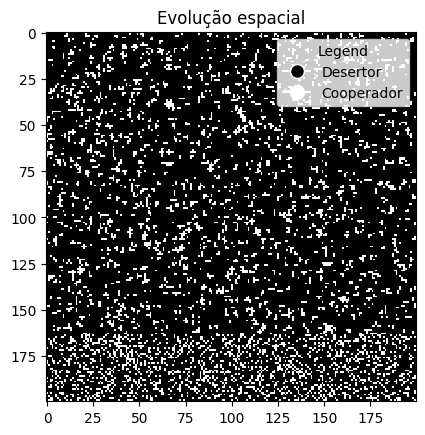

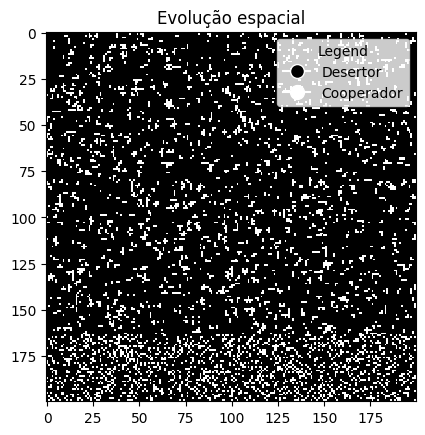

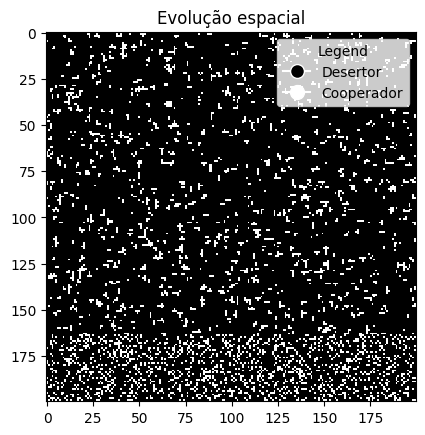

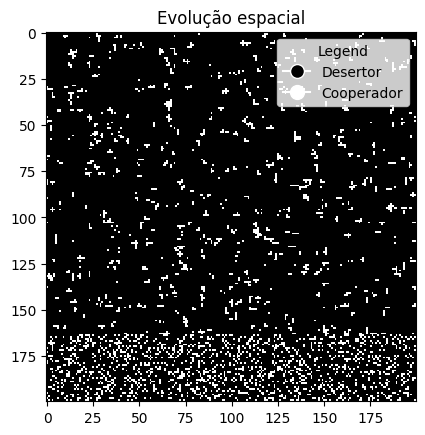

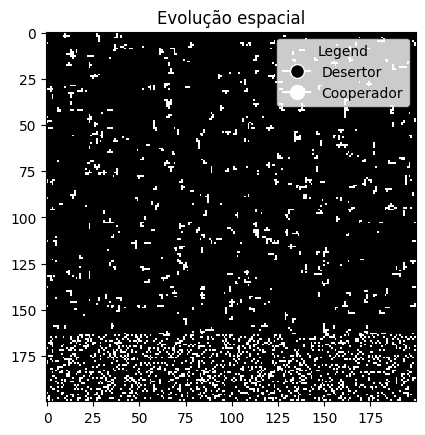

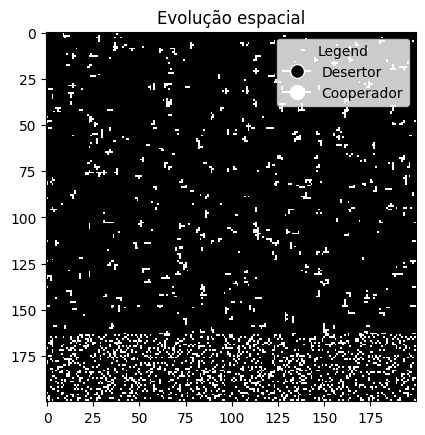

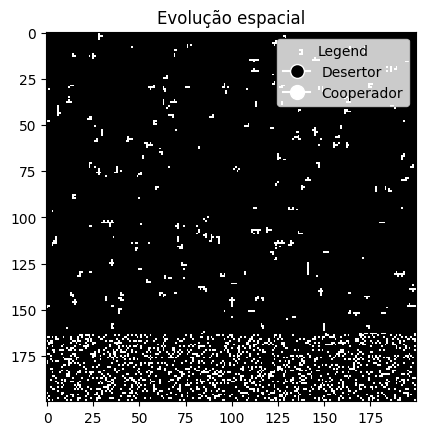

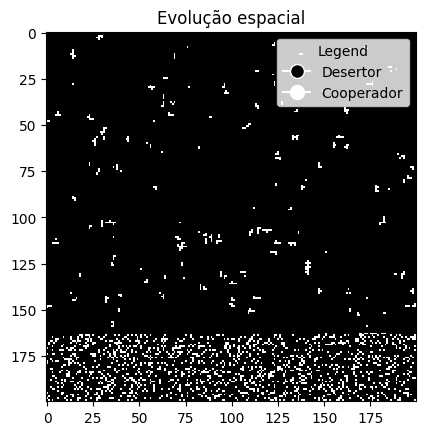

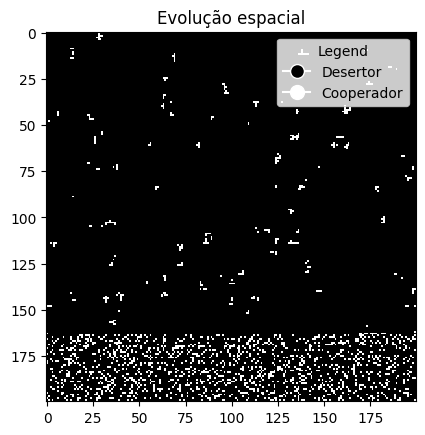

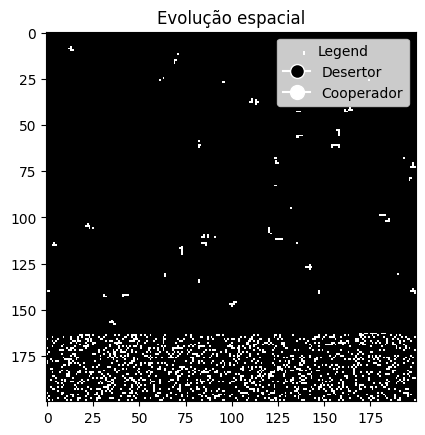

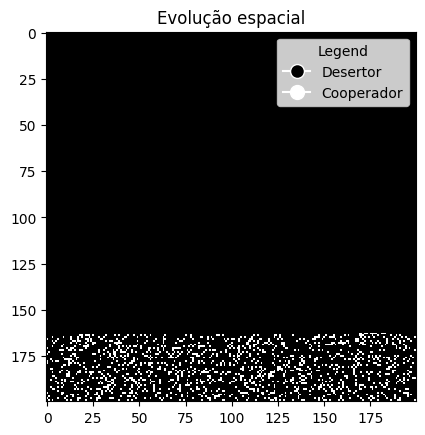

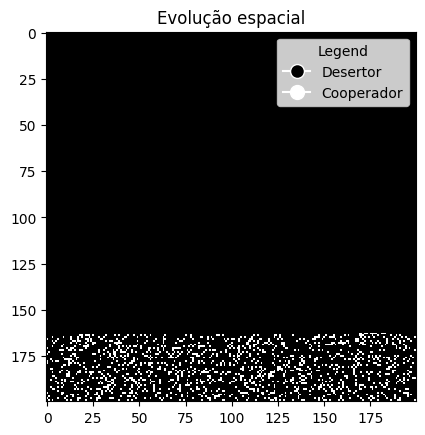

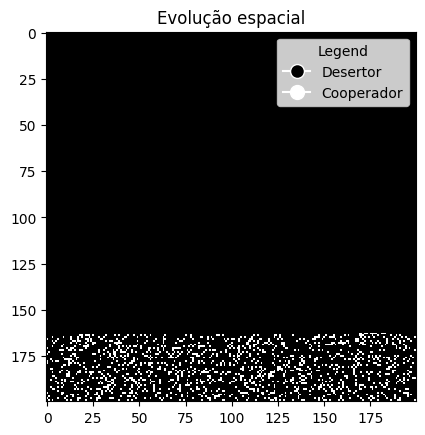

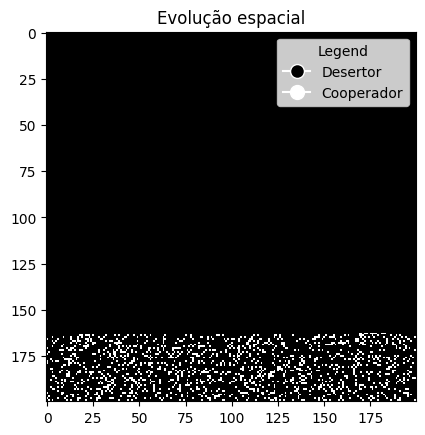

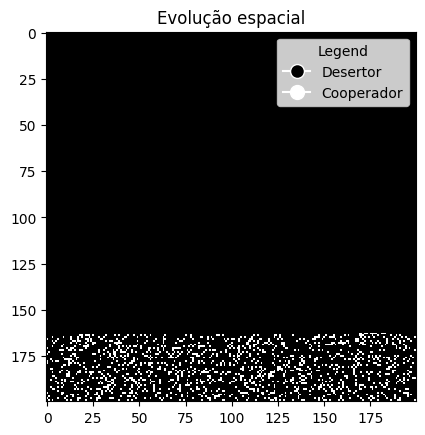

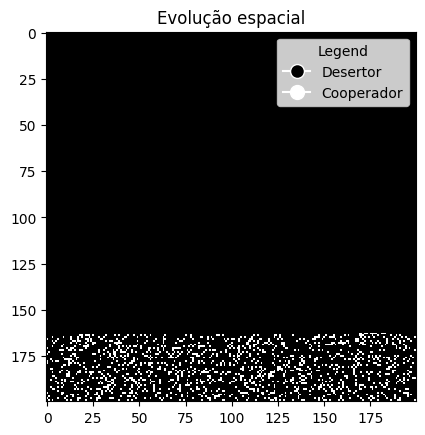

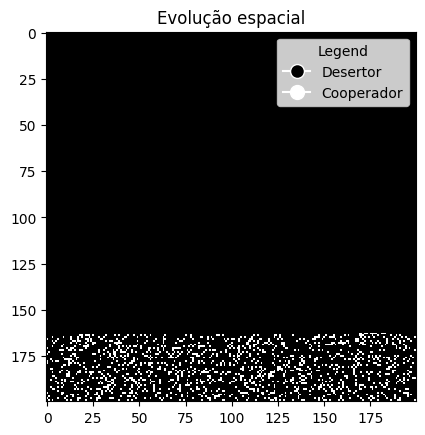

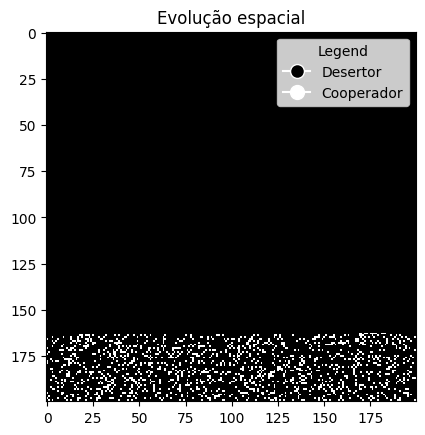

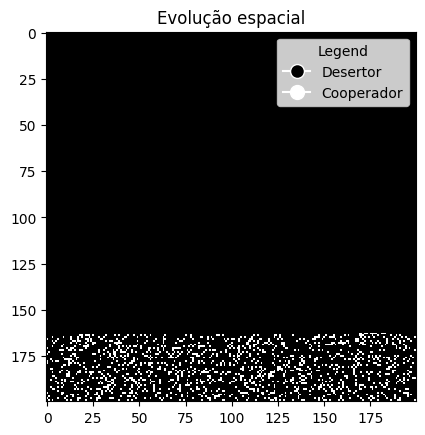

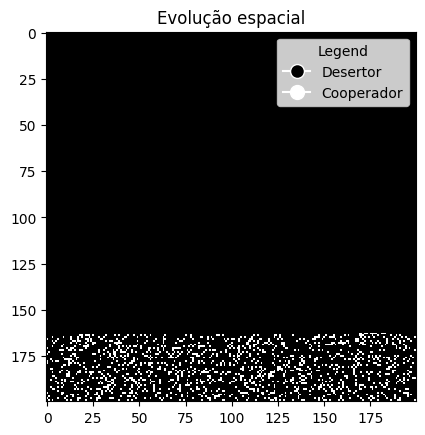

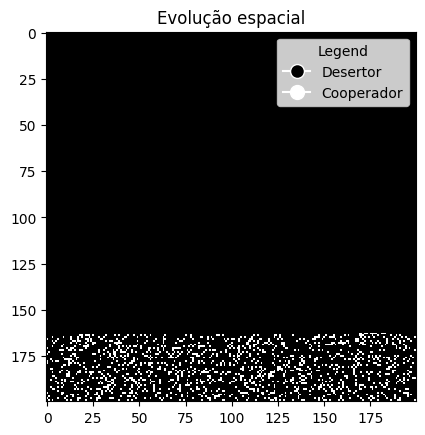

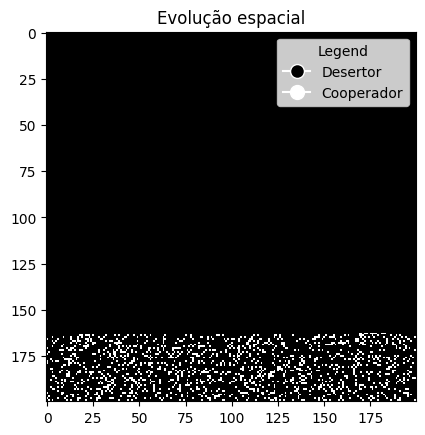

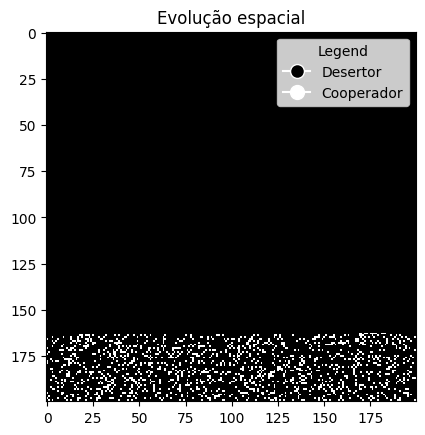

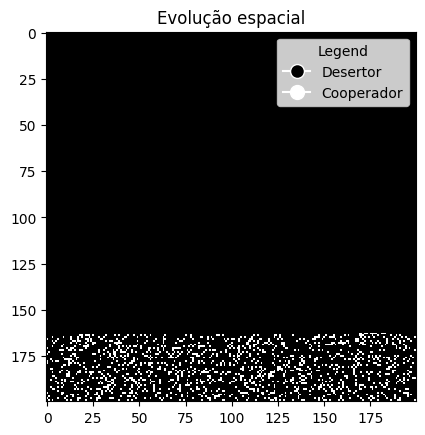

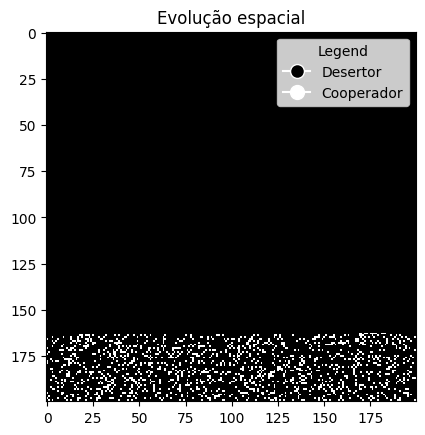

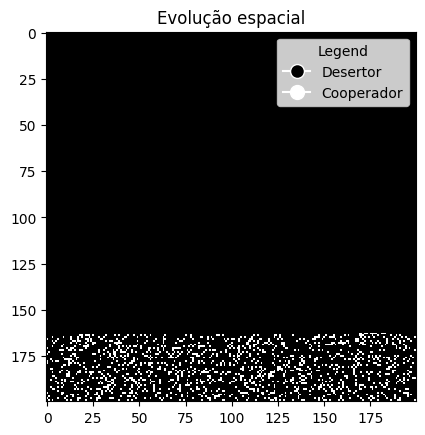

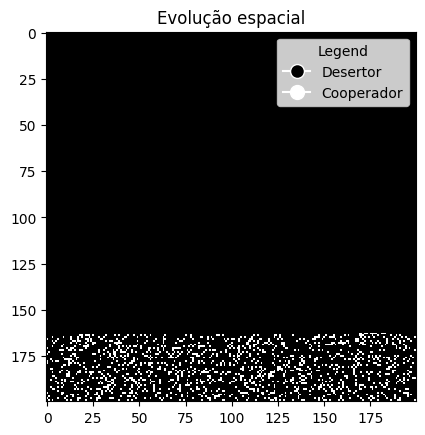

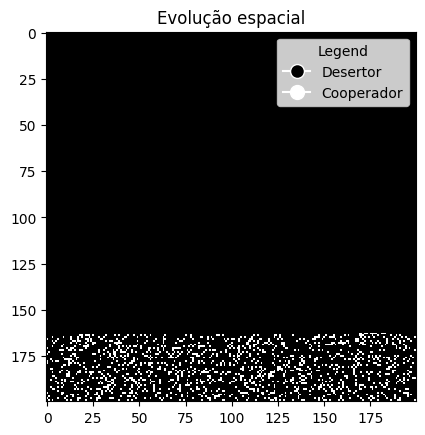

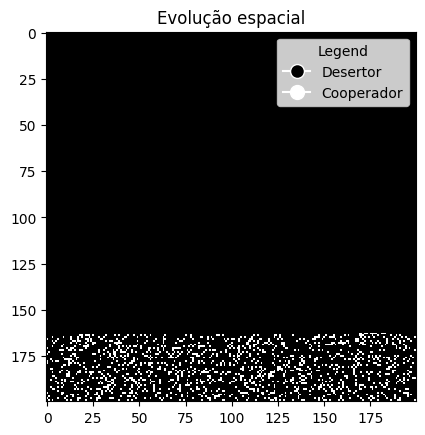

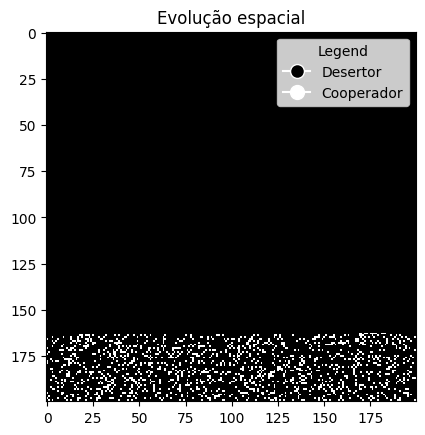

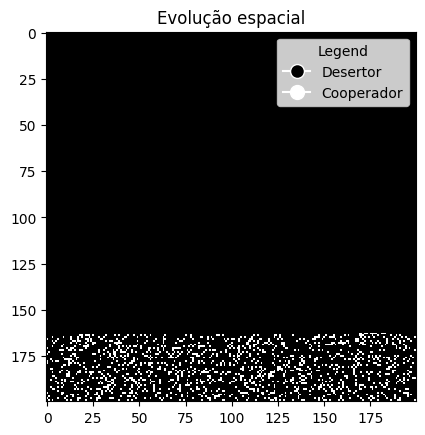

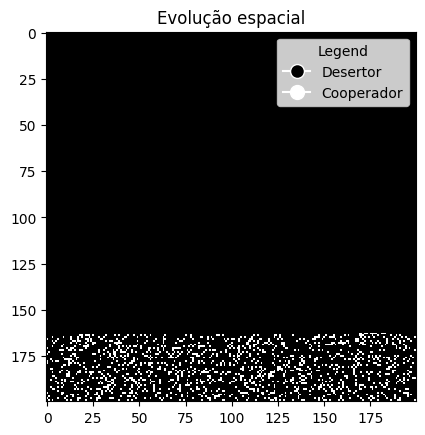

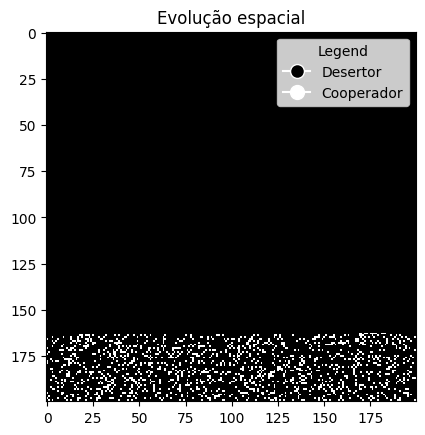

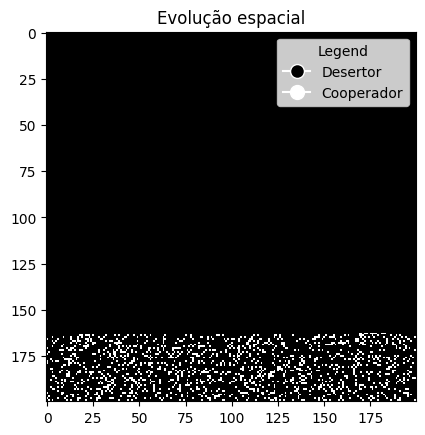

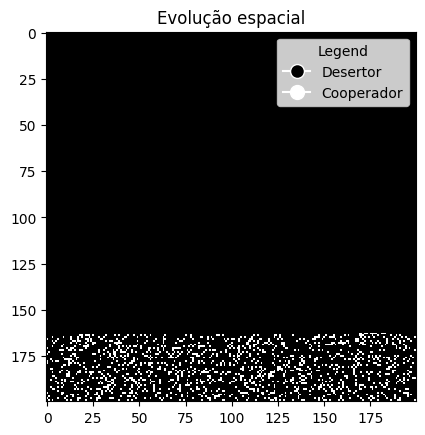

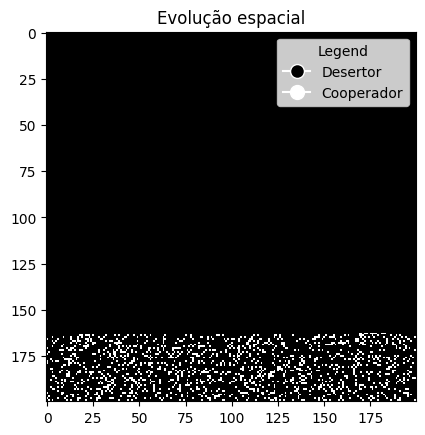

In [15]:
plotar_evolucao_espacial(arr_estrategias)

Ao observar a evolução espacial de cooperadores e desertores, conclui-se que, primeiramente, à primeira vista, a população começa com uma quantidade parecida de desertores e colaboradores e esses dois grupos estão bem espalhados pelo grid. Em seguida, os colaboradores começam a diminuir enquanto os desertores começam a se espalhar e aumentar de número, muito provavelmente por conta do fato do ser de um valor relativamente alto. Ao final, o número de de indivíduos nos dois grupos parece permanecer estável, e o grid assume uma configuração com uma população grande de desertores com algumas cooperadores isolados na parte inferior.